# Lab 02: Image Convolution Lab
1. Objective:  
• To understand the basics of image convolution and its applications in image processing

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### Mean Filter
• Mean Filter:  
 The Mean Filter is a basic convolution kernel that helps in image
blurring by calculating the average value of pixel intensities within a defined neighborhood.  
– Read in your favorite image on the disk,  
– Create a kernel as a small matrix. For example, you can use a 3x3 mean filter:  
G1 = [111; 111; 111]/9,  
– Convolve your image with g1.  
– What happens?

The mean filter is a simple convolution kernel that averages the pixel intensities within a defined neighborhood. Applying the mean filter to an image results in a blurred effect, as the sharp edges and transitions are smoothed out. This technique is often used for noise reduction and image smoothing.

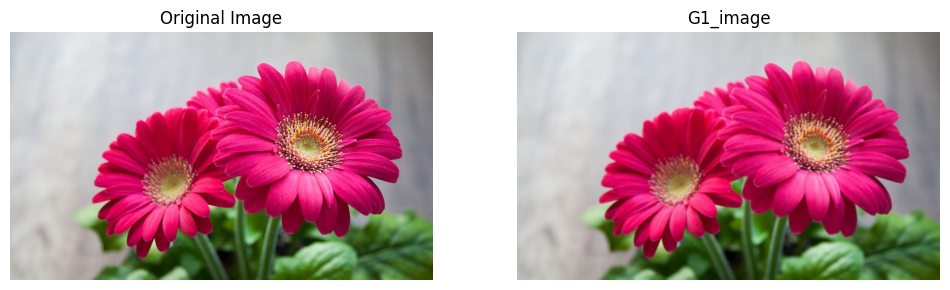

In [ ]:
original_image = plt.imread("flowers.png")

G1 = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9

G1_image = cv2.filter2D(original_image, -1, G1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(G1_image)
plt.title("G1_image")
plt.axis("off")

plt.show()

### Create some new kernel
– Create G2, a filter that multiplies the image intensities by 2,    
– Create G2, a filter that sharpens the image (you should define g3 in terms of g1
and g2).  
– Try applying both of these to an image, and take a look at the results.

Custom convolution kernels can be designed to achieve specific effects by modifying the weights assigned to neighboring pixels. In this lab, we created two kernels: one that doubles the image intensities and another that sharpens the image by subtracting the brightened image from the original image.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


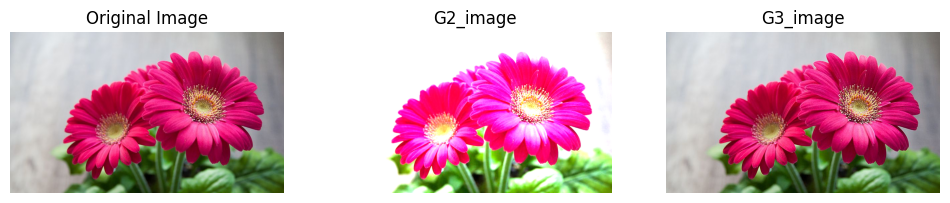

In [ ]:
G2 = np.array([[0, 0, 0], [0, 2, 0], [0, 0, 0]])
G2_image = cv2.filter2D(original_image, -1, G2)
G3 = G2 - G1
G3_image = cv2.filter2D(original_image, -1, G3)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(G2_image)
plt.title("G2_image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(G3_image)
plt.title("G3_image")
plt.axis("off")

plt.show()

### Try this filter: G4 = [−1 − 10; −130; 000].

– When you use cv2.imshow to view the result, the image will look mostly black,  
– This is because the entries of this kernel sum to 0, instead of 1.  
– To fix this, add 0.5 to the resulting image.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


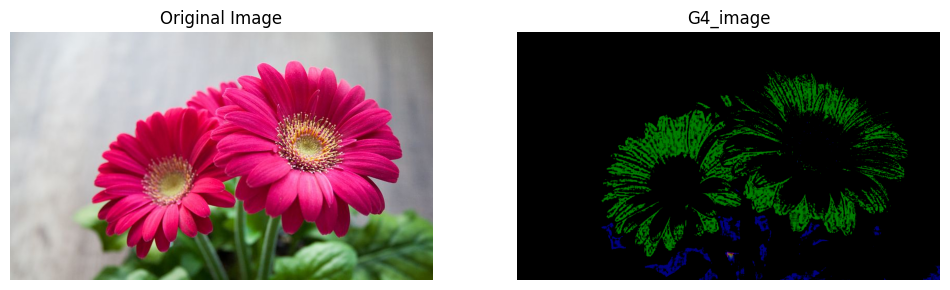

In [ ]:
G4 = np.array([[-1, -10], [-1, -30], [0, 0]])

g4_result = cv2.filter2D(original_image, -1, G4)

G4_image = g4_result + 0.5

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(G4_image)
plt.title("G4_image")
plt.axis("off")

plt.show()

### Twice-blurred

Blurring an image multiple times using the mean filter increases the overall blurring effect. This is because each iteration averages the pixel intensities over a larger neighborhood, further smoothing out the details and transitions in the image.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


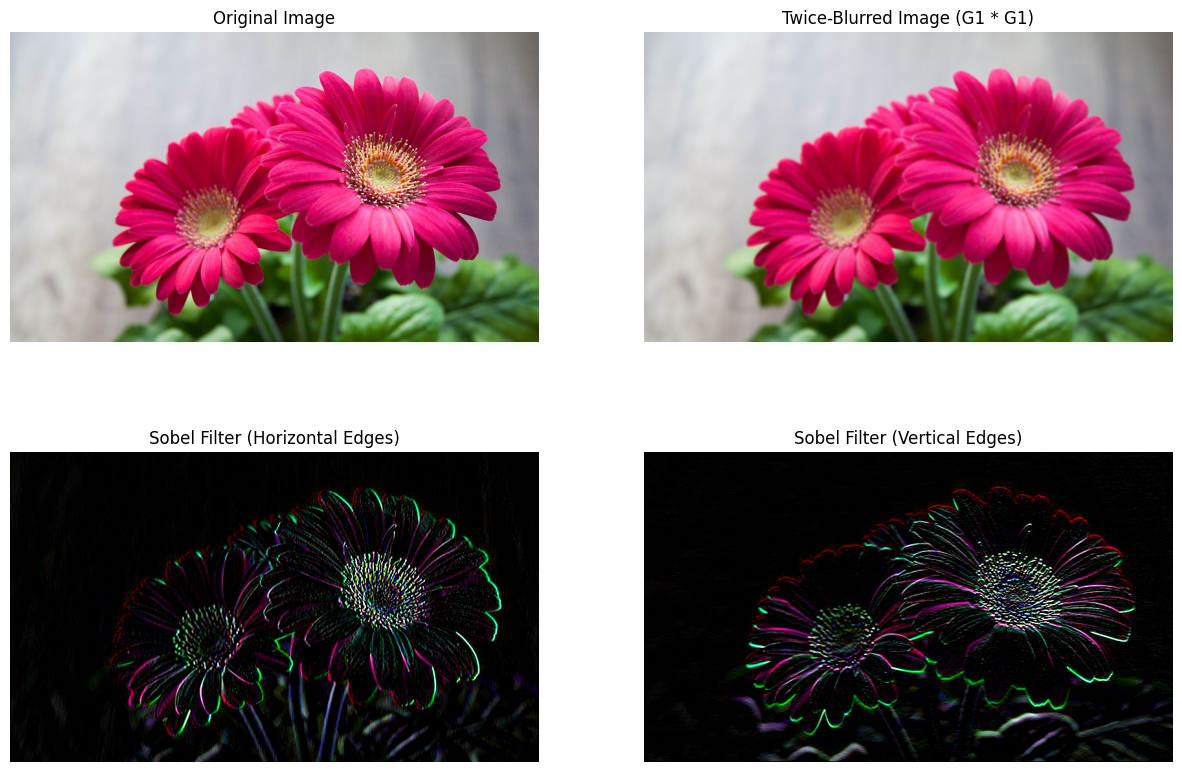

In [ ]:
twice_blurred_image = cv2.filter2D(cv2.filter2D(original_image, -1, G1), -1, G1)

sobel_x = cv2.Sobel(original_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(original_image, cv2.CV_64F, 0, 1, ksize=3)


plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(twice_blurred_image)
plt.title("Twice-Blurred Image (G1 * G1)")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(sobel_x, cmap="gray")
plt.title("Sobel Filter (Horizontal Edges)")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(sobel_y, cmap="gray")
plt.title("Sobel Filter (Vertical Edges)")
plt.axis("off")

plt.show()